In [122]:
import scipy.io.wavfile as wavfile

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import IPython.display as ipd
import math
from statsmodels.tsa.stattools import acf as lib_acf

In [87]:
from enum import Enum
from functools import partial
from scipy import signal

class Waveform(Enum):
    @staticmethod
    def triangular(args):
        return signal.sawtooth(args, 0.5)
    
    HARMONIC = partial(np.sin)
    SQUARE = partial(signal.square)
    TRIANGULAR = partial(triangular.__func__)
    SAWTOOTH = partial(signal.sawtooth)
    
def acf(x, m):
    return lib_acf(x, adjusted=True, nlags=m)

def tone(f, t, waveform, fs):
    samples = np.linspace(0, t, round(t * fs + 1))
    return waveform.value( 2* np.pi * f * samples)

In [128]:
fs, x = wavfile.read('lab2_voirce_record.wav')

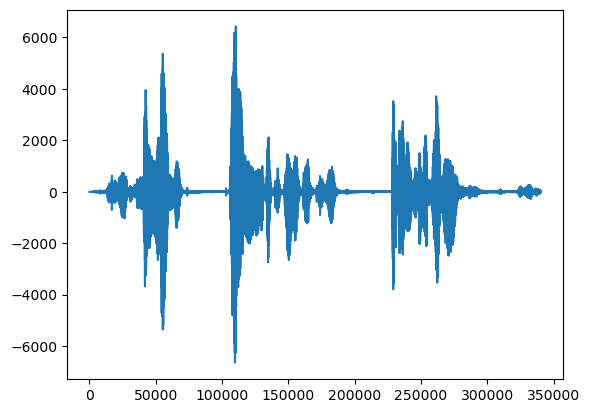

In [134]:
plt.plot(np.linspace(0, len(x), len(x) ), x)

In [135]:
def get_mean(x):
    return sum(x) / len(x)

def my_acf(x, m):
    mean = get_mean(x)
    result = 0
    N = len(x)
    for i in range(N - m - 1):
        result += (x[i] - mean) * (x[i+m] - mean)
    
    return (result / (N - m))

def my_norm_acf(x, m):
    return my_acf(x, m)/my_acf(x, 0)

In [136]:
NUM_ITER = 10
my_norm_acf_calculation = [my_norm_acf(values, i) for i in range (NUM_ITER)]
lib_norm_acf_calculation= acf(values, NUM_ITER -1 )

In [138]:
# Comparasion of lib acf func and my_acf func
sum(np.floor(np.abs(my_norm_acf_calculation - lib_norm_acf_calculation)))

0.0

<StemContainer object of 3 artists>

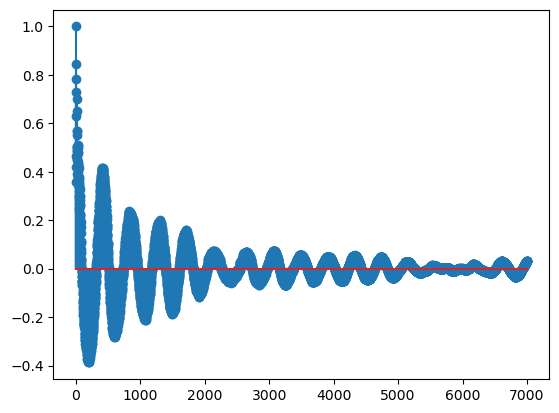

In [156]:
# plt.xlim(0, 10)
values_for_plot = acf(x, 7000)
plt.stem(np.linspace(0, 7000, 7001), values_for_plot)

In [164]:
_, min_value_idx =  min(( (value, i) for (i, value) in enumerate(values_for_plot)))


In [165]:
_, second_peak_idx = max(( (value, i) for(i, value) in enumerate(values_for_plot[min_value_idx:]) ))

In [170]:
# Частота голоса
1 / ((min_value_idx + second_peak_idx) / fs)

117.07317073170732

In [193]:
def my_dtft(x, fs, f):
    f_array = []
    if not hasattr(f, '__iter__'):
        f_array.append(f)
    else:
        f_array = f
        
    result = []
    for f_i in f_array:
        omega = (2* np.pi *f_i) /fs

        second_vector = np.exp ([   - complex('1j') * omega * i   for i in range(len(x)) ])
        result.append(abs(np.dot(x, second_vector)))
    
    return result

In [194]:
result = my_dtft(x, fs,  range(40, 500))

<StemContainer object of 3 artists>

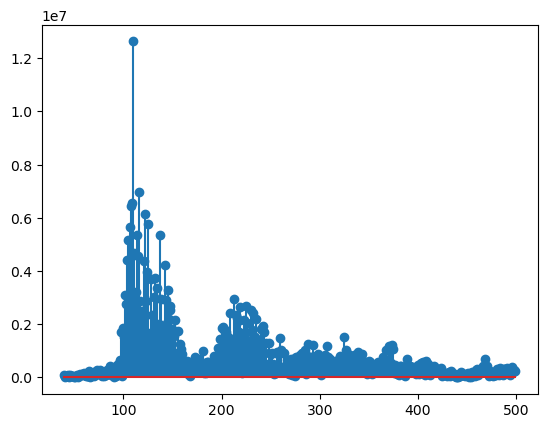

In [195]:
plt.stem(range(40, 500), result)